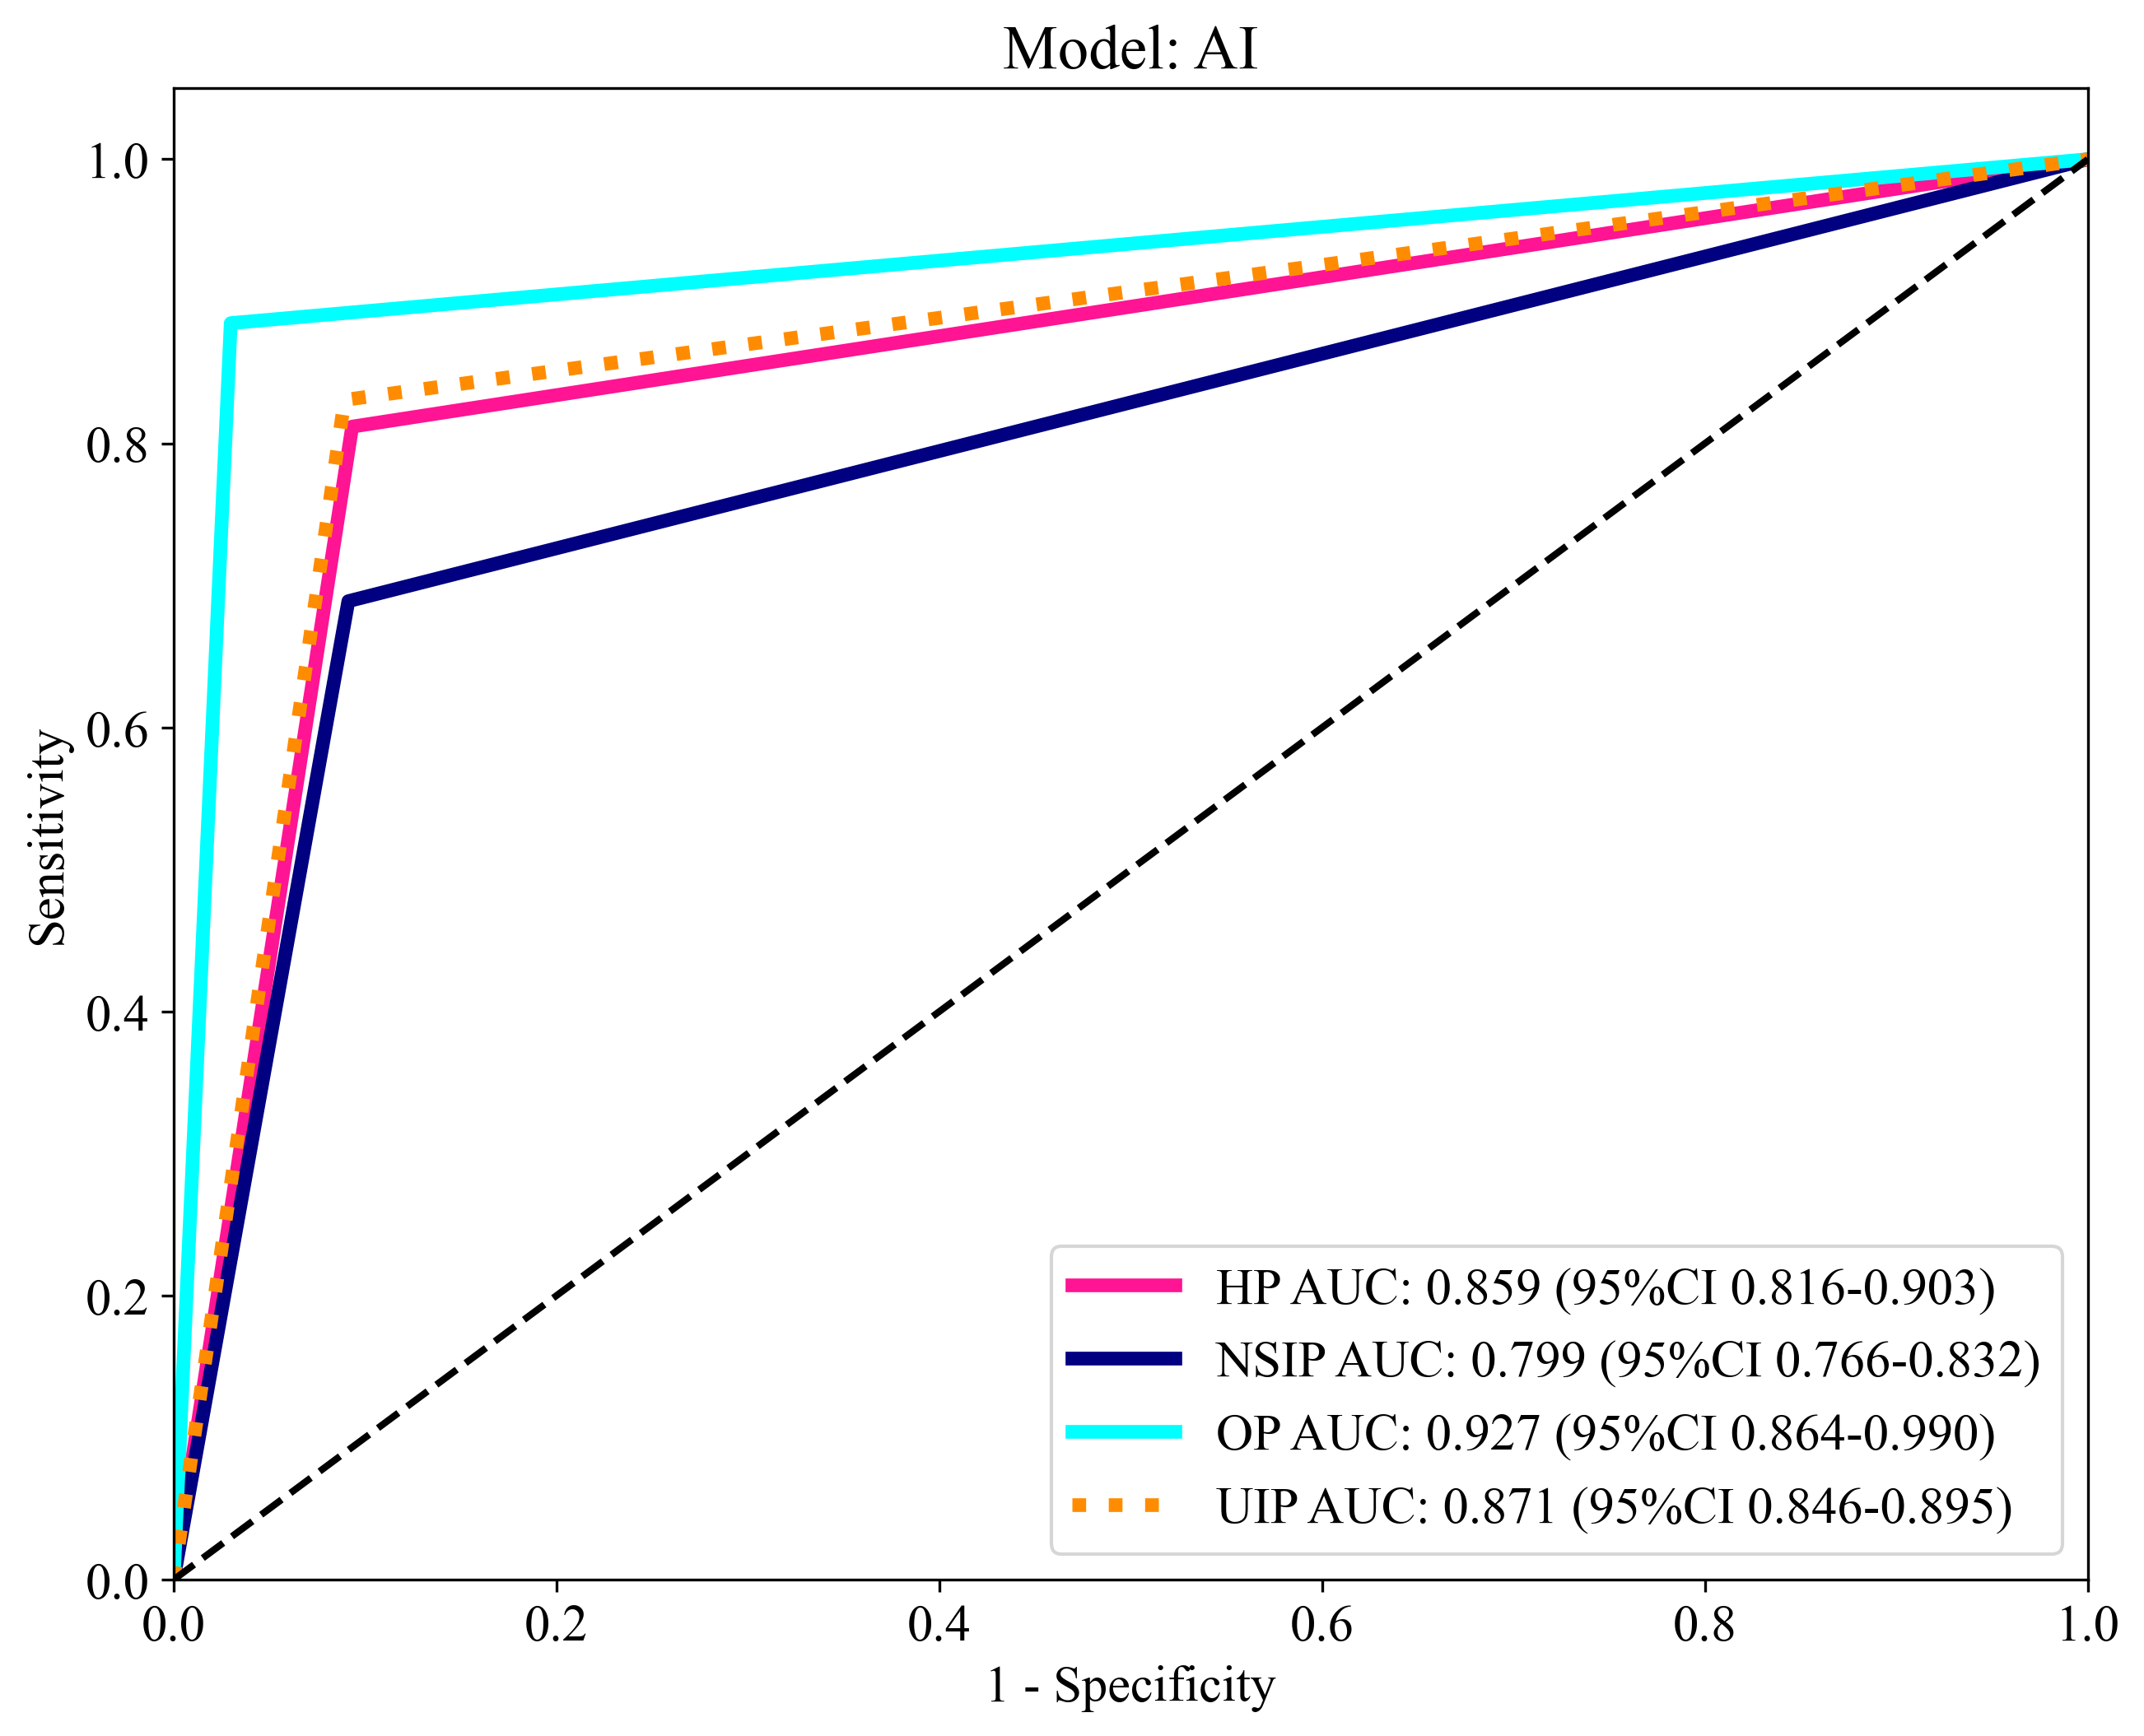

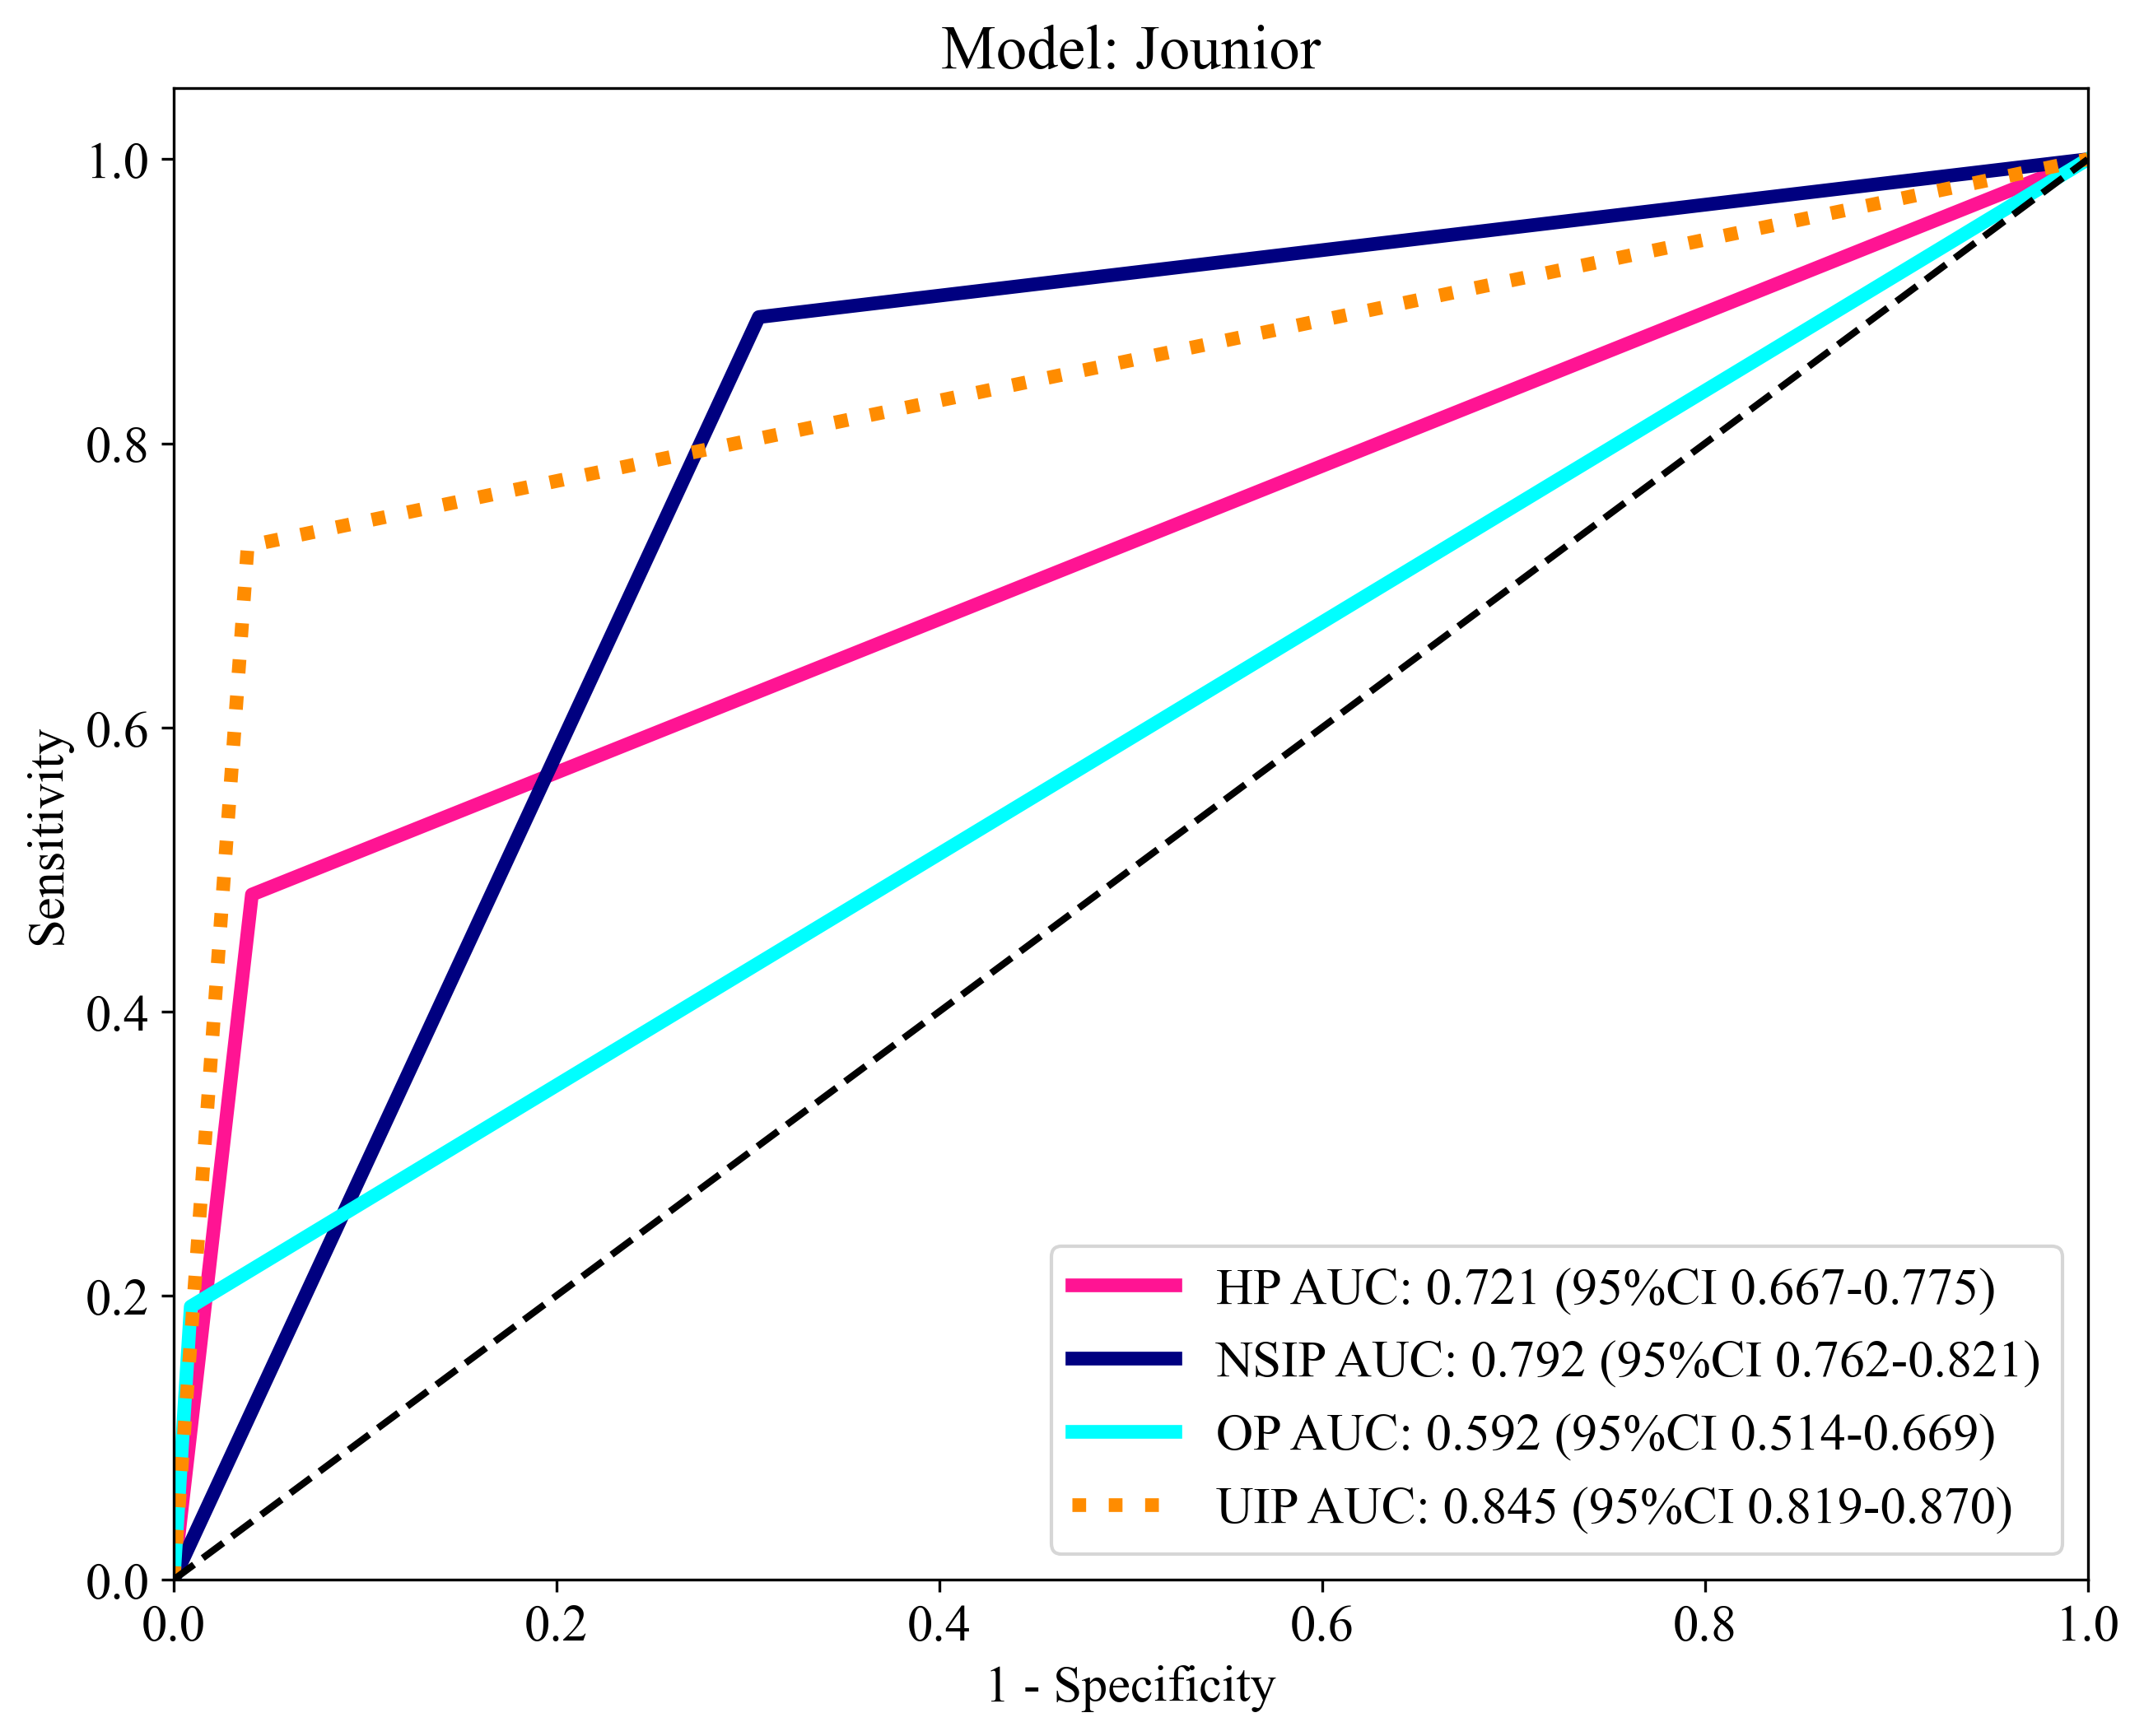

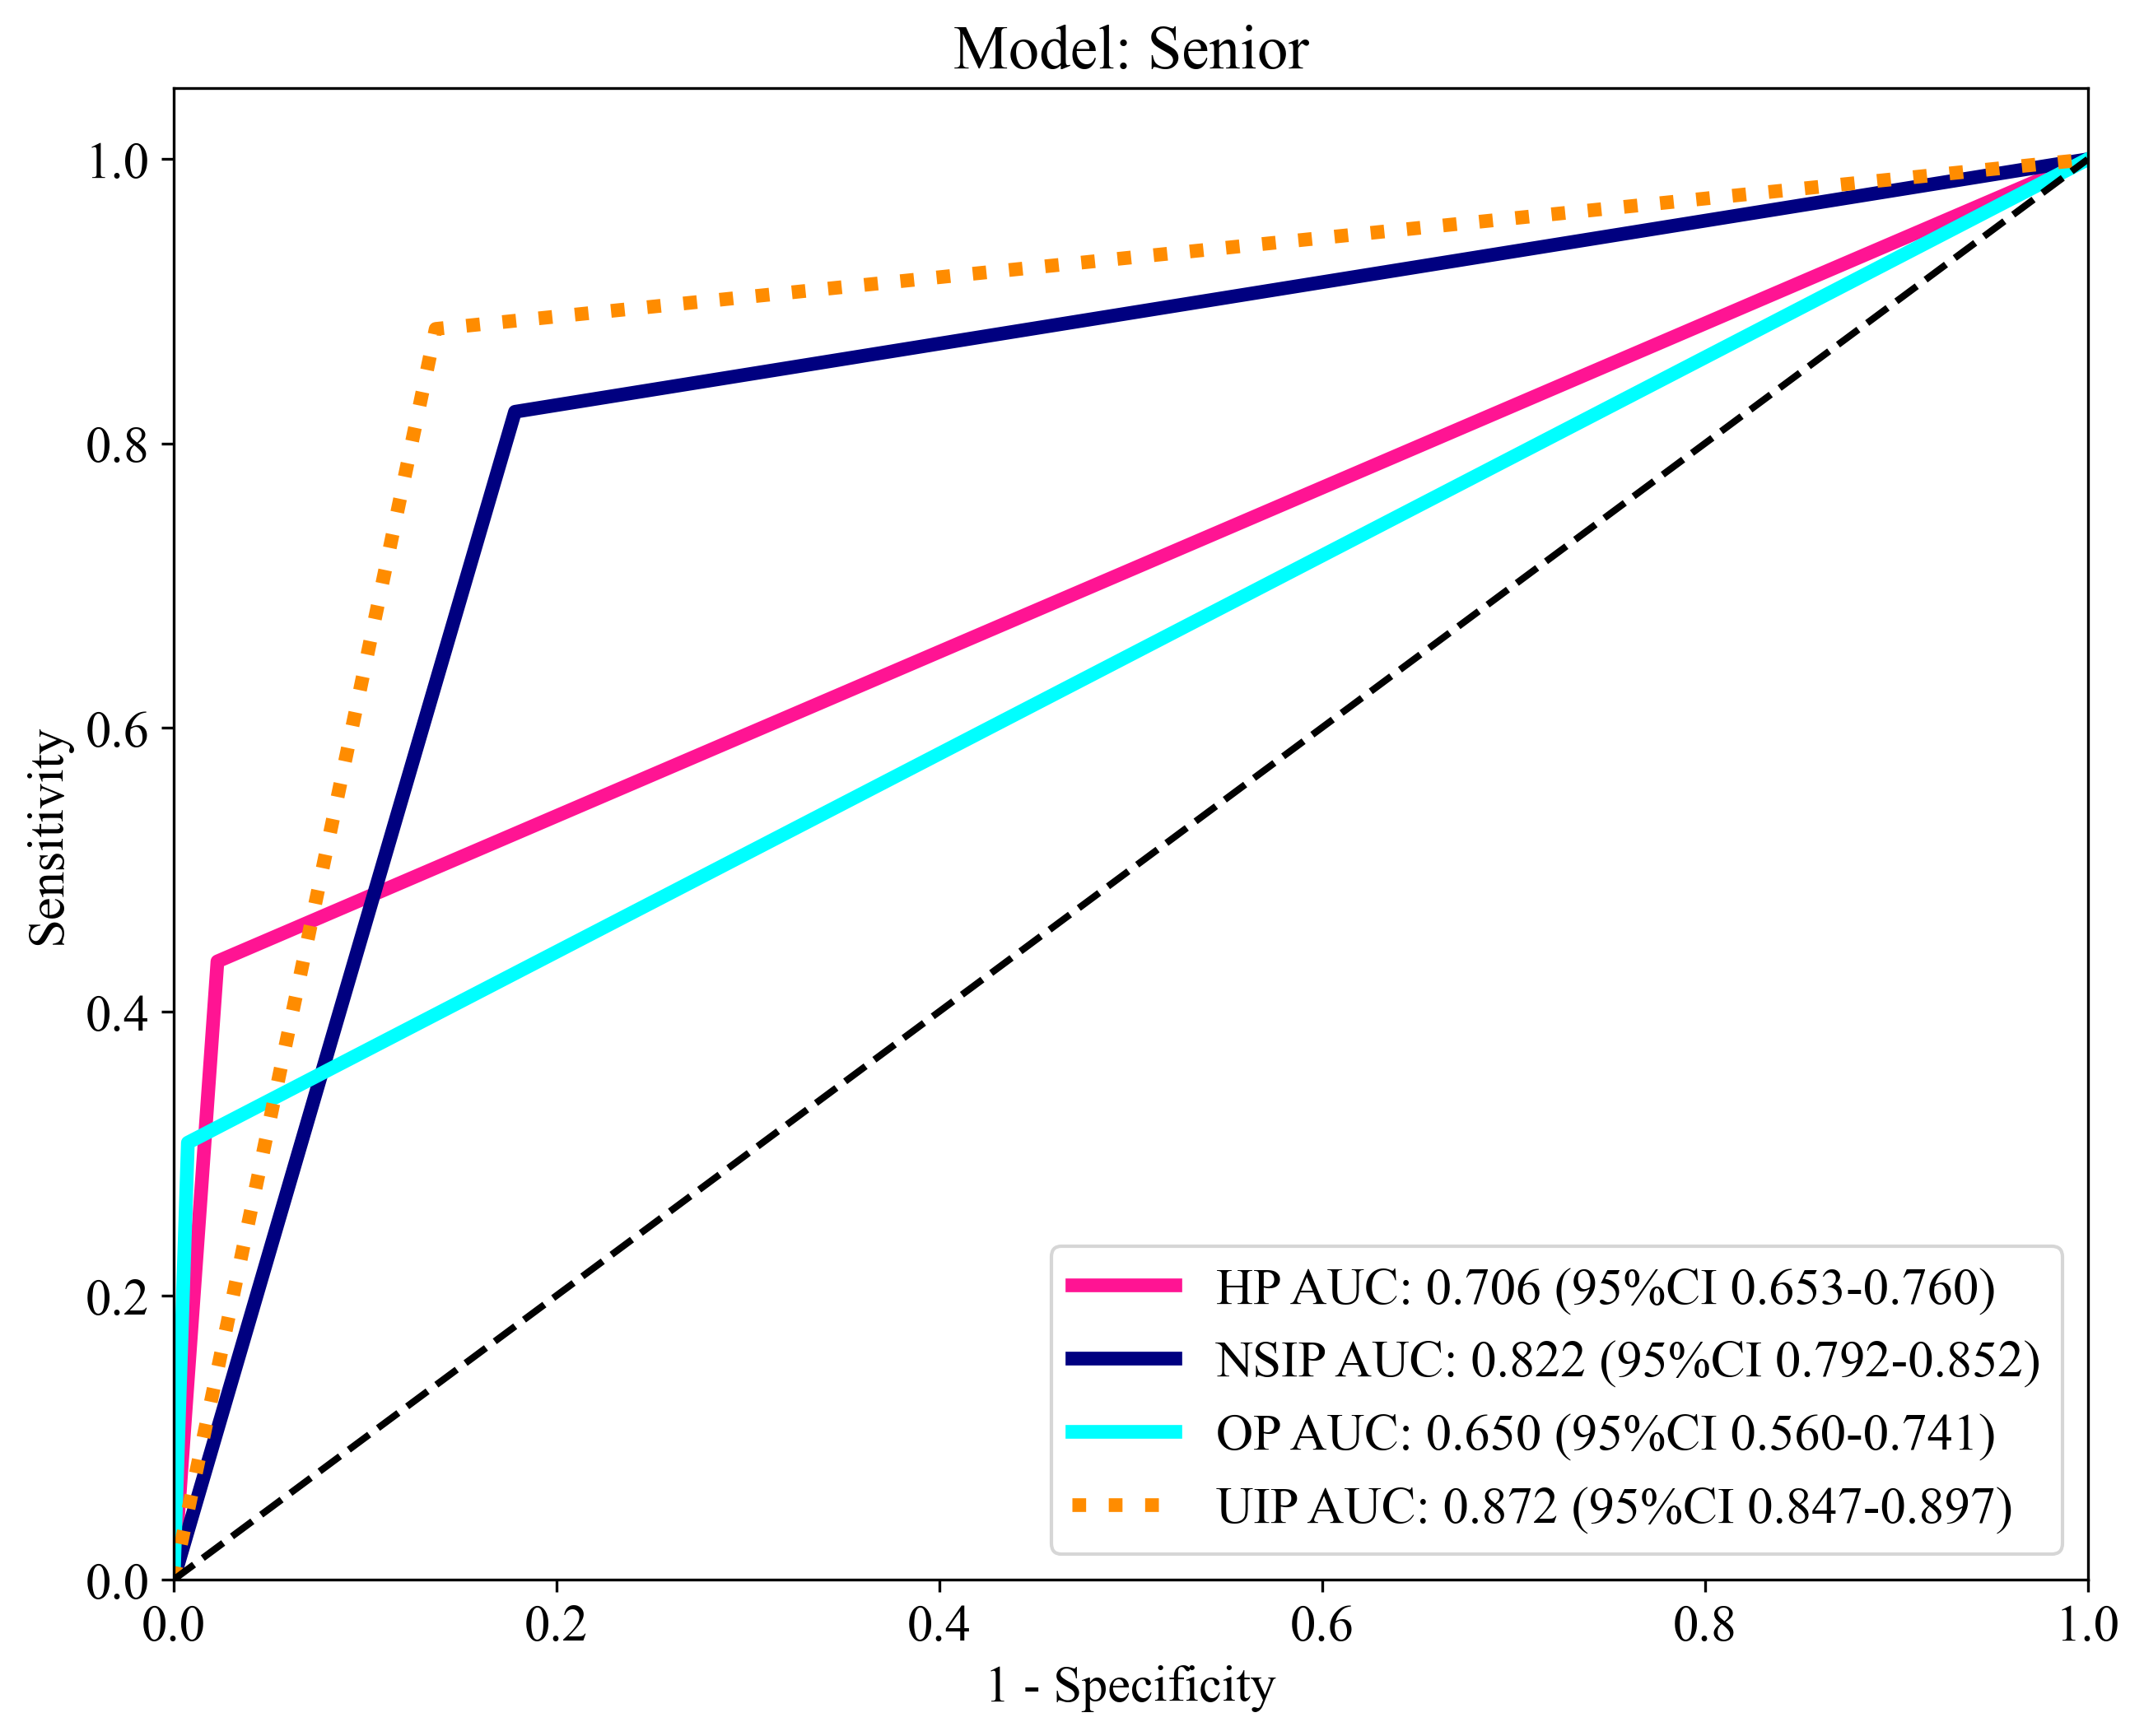

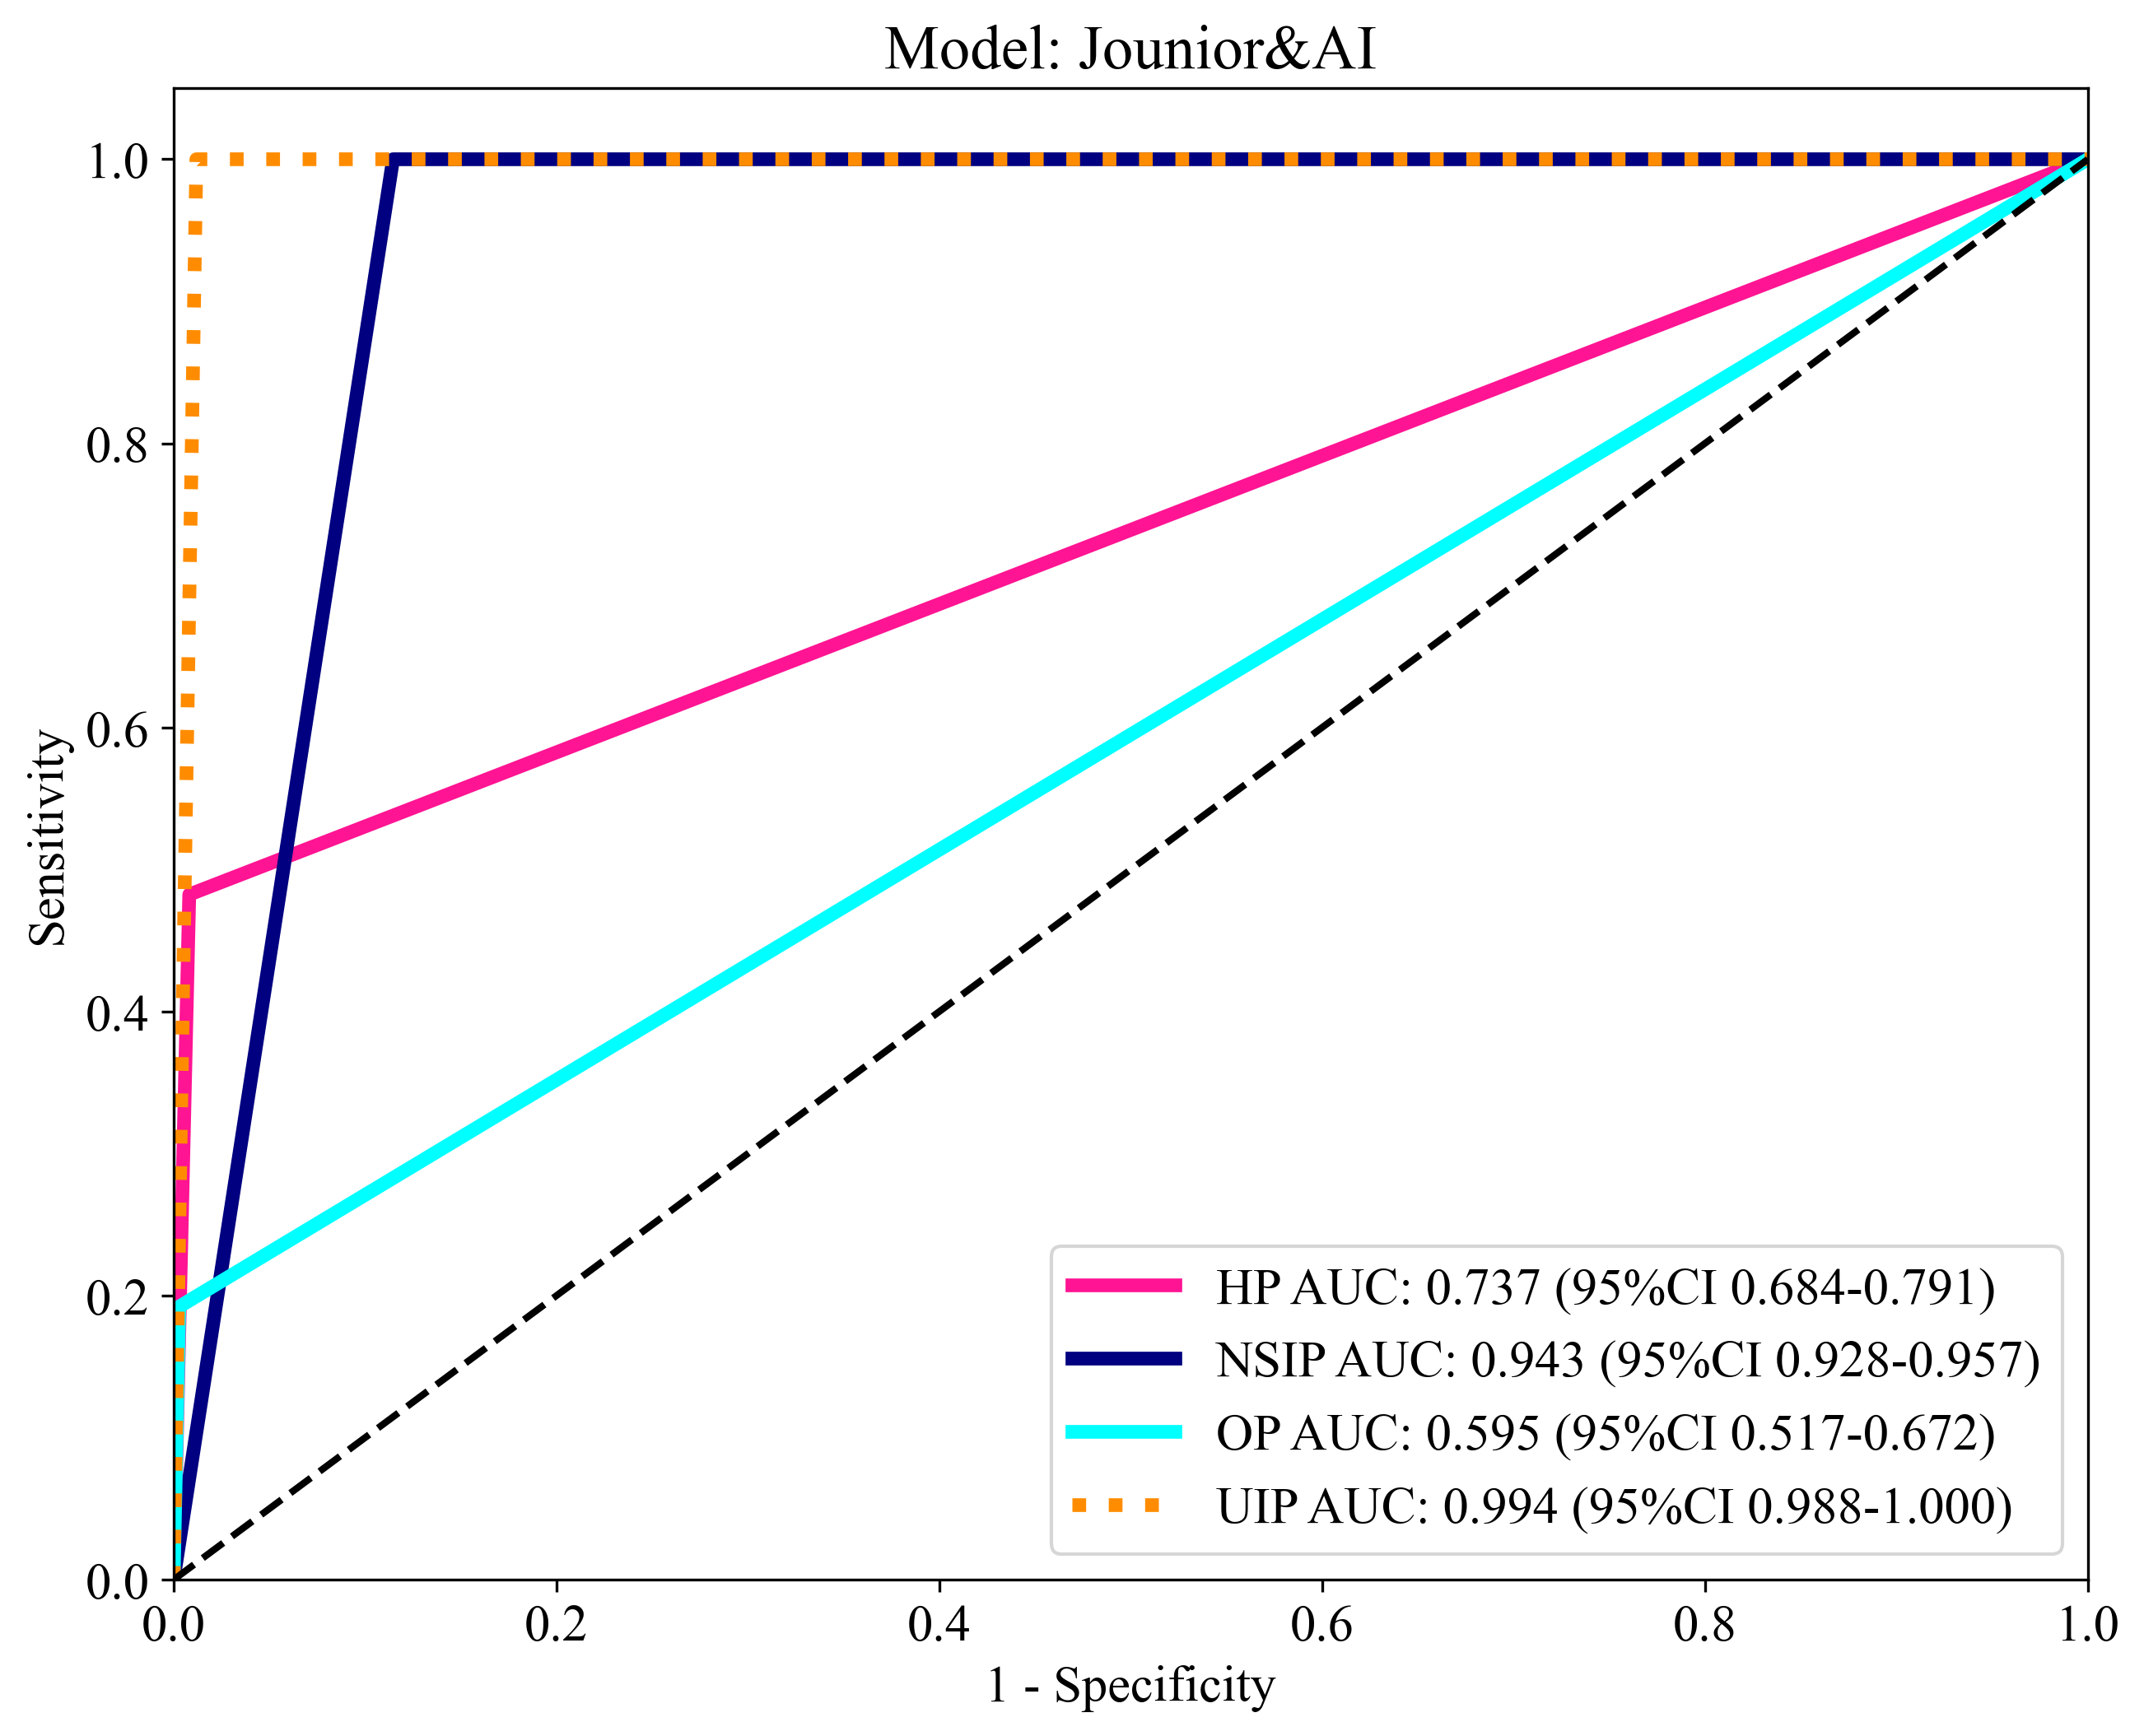

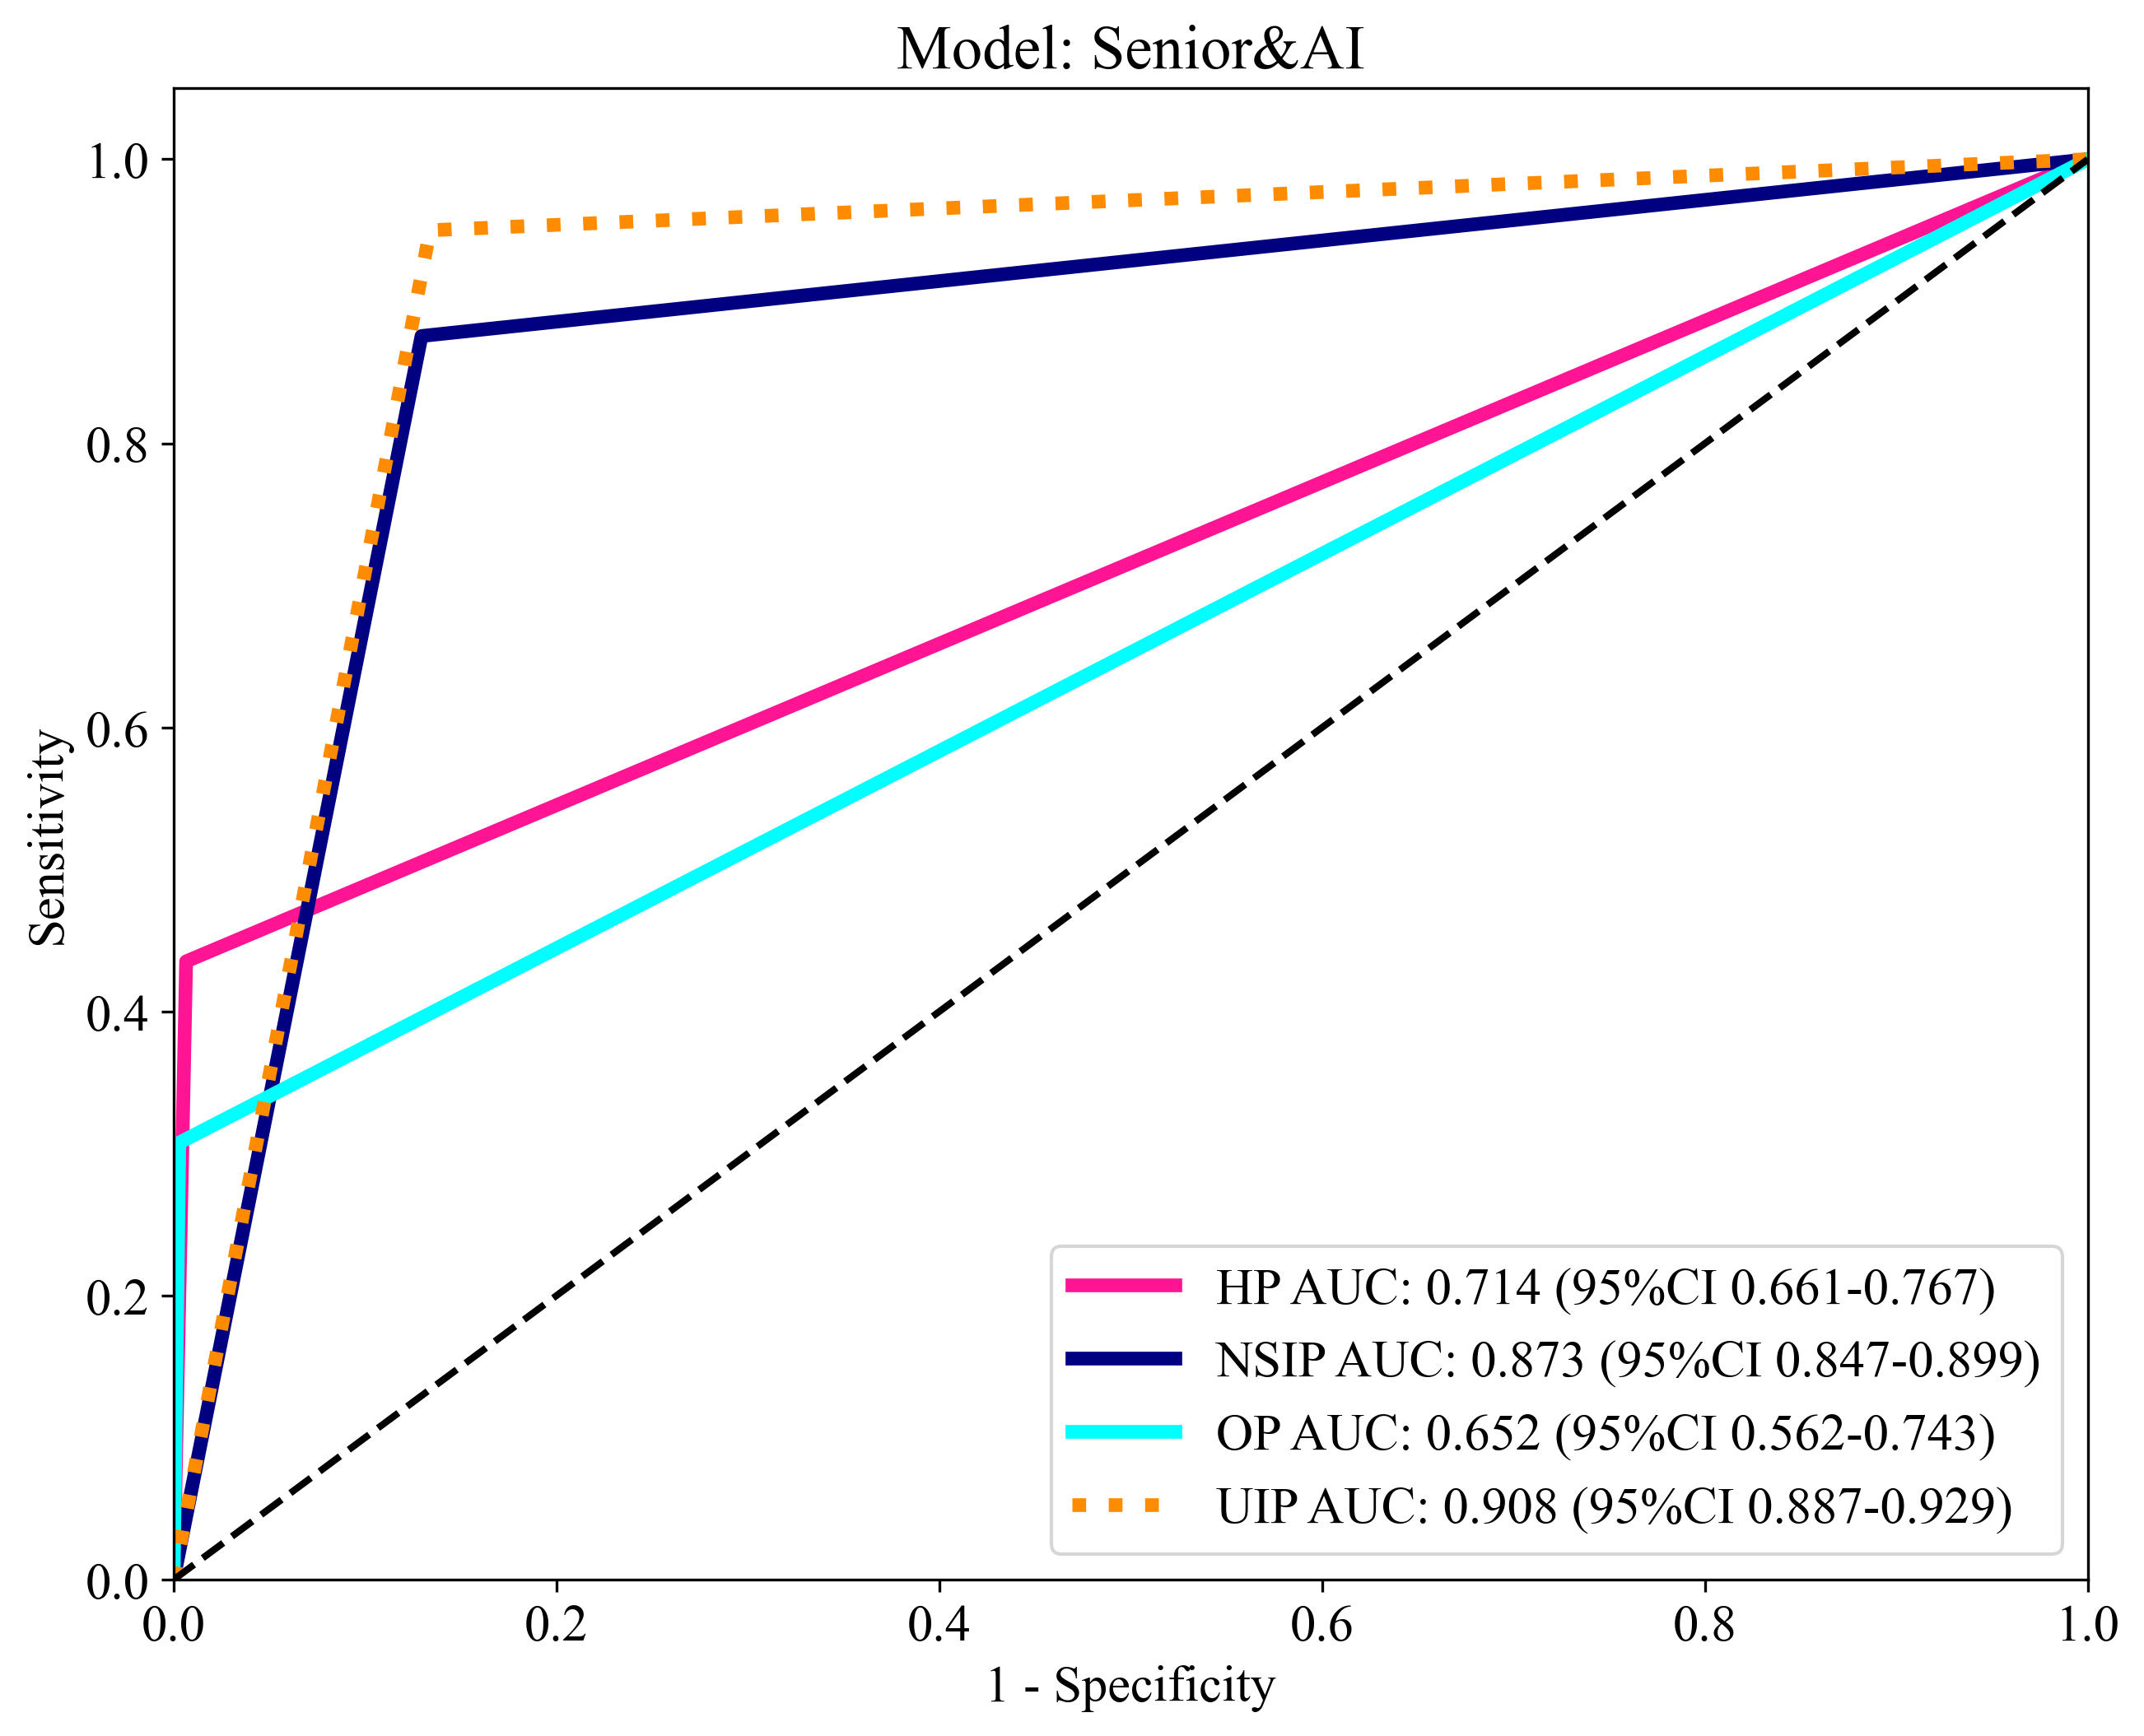

,ModelName,Acc,AUC,95% CI,Sensitivity,Specificity,PPV,NPV,Precision,Recall,F1,Threshold,Class
0,AI,0.878,0.859,0.8159-0.9026,0.0,1.0,0.0,0.878,0.0,0.0,NaN,1.0,HP
1,AI,0.677,0.799,0.7658-0.8318,0.0,1.0,0.0,0.677,0.0,0.0,NaN,1.0,NSIP
2,AI,0.963,0.927,0.8644-0.9903,0.0,1.0,0.0,0.963,0.0,0.0,NaN,1.0,OP
3,AI,0.483,0.871,0.8459-0.8953,0.0,1.0,0.0,0.483,0.0,0.0,NaN,1.0,UIP
4,Jounior,0.878,0.721,0.6667-0.7747,0.0,1.0,0.0,0.878,0.0,0.0,NaN,1.0,HP
5,Jounior,0.677,0.792,0.7623-0.8209,0.0,1.0,0.0,0.677,0.0,0.0,NaN,1.0,NSIP
6,Jounior,0.963,0.592,0.5143-0.6690,0.0,1.0,0.0,0.963,0.0,0.0,NaN,1.0,OP
7,Jounior,0.483,0.845,0.8193-0.8698,0.0,1.0,0.0,0.483,0.0,0.0,NaN,1.0,UIP
8,Senior,0.878,0.706,0.6528-0.7595,0.0,1.0,0.0,0.878,0.0,0.0,NaN,1.0,HP
9,Senior,0.677,0.822,0.7915-0.8524,0.0,1.0,0.0,0.677,0.0,0.0,NaN,1.0,NSIP


In [3]:
import os
import numpy as np
import pandas as pd

from onekey_algo.custom.components.comp1 import draw_roc
from onekey_algo.custom.components import metrics
import matplotlib.pyplot as plt
from onekey_algo import get_param_in_cwd

metric_results = []
save_dir = r'J:\4type\model\histogramWRT\human_ai'
val_log = pd.read_csv(r"J:\4type\model\histogramWRT\human_ai\ALL_results.csv")
models = ['AI','Jounior','Senior','Jounior&AI','Senior&AI']
ul_labels = np.unique(val_log['label'])
ann = {0:"HP",1:"NSIP",2:"OP",3:"UIP"}
for model in models:
    all_pred = []
    all_gt = []
    all_labels = []
    for ul in ul_labels:
#         pred_score = [1 if gt_ == ul else 0 for gt_ in np.array(val_log[model])]
        pred_score = pd.get_dummies(val_log[model],columns=[model])[ul].values
        gt = [1 if gt_ == ul else 0 for gt_ in np.array(val_log['label'])]
        acc, auc, ci, tpr, tnr, ppv, npv, precision, recall, f1, thres = metrics.analysis_pred_binary(gt, pred_score)
        ci = f"{ci[0]:.4f}-{ci[1]:.4f}"
        metric_results.append([model, acc, auc, ci, tpr, tnr, ppv, npv, precision, recall, f1, thres, f"{ann[ul]}"])

        all_pred.append(np.array(pred_score))
        all_gt.append(gt)
        all_labels.append(f"{ann[ul]}")
        
        

    draw_roc(all_gt, all_pred, labels=all_labels, title=f"Model: {model}", ls=['-', '-', '-', ':', ':', ':'])
    plt.savefig(os.path.join(save_dir, f'model_{model}_roc.svg'), bbox_inches = 'tight')
    plt.show()
metrics = pd.DataFrame(metric_results, 
                       columns=['ModelName', 'Acc', 'AUC', '95% CI', 'Sensitivity', 'Specificity', 'PPV', 'NPV', 
                                'Precision', 'Recall', 'F1', 'Threshold', 'Class'])
metrics.to_csv(r'J:\4type\model\histogramWRT\human_ai\Results.csv',index=False)
metrics